# Importing the Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the Datasets

In [3]:
df=pd.read_csv('Data_Sets/WorkoutDataset.csv', index_col=0)
df = df.reset_index(drop=True)  # Reset index and drop old index column
df.insert(0, 'Index', df.index)  # Insert new index column at the beginning

# Data exploration and the Initial Inspection

In [5]:
df.head(5)

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


# Handling the duplicates

In [7]:
# Dropping the duplicates
df.drop_duplicates(inplace=True, keep='first')

In [8]:
# Checking for unique values in the Rating and RatingDesc columns: 
# We can impute the missing values in the RatingDesc column based on the Rating column
print(df.Rating.unique())
print(df.RatingDesc.unique())

[0.  nan 8.9 8.5 8.3 7.  4.7 7.7 7.3 9.3 8.6 9.5 9.2 9.  8.8 8.4 8.  9.1
 8.2 8.1 7.9 5.  8.7 7.8 7.5 7.4 6.9 6.5 3.9 6.4 4.  2.8 6.7 3.8 2.4 1.6
 7.1 3.6 3.2 5.8 7.6 7.2 4.8 3.3 1.  6.  5.3 2.7 6.3 5.6 4.1 4.9 4.2 5.5
 5.9 3.  9.4 6.2 9.6 2.5 5.2 6.6 3.5 3.1 4.4 4.3 5.4 4.5 5.1 5.7 6.8 3.4
 6.1]
[nan 'Average']


# Handling the missing value

In [18]:
df.columns


Index(['Index', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc'],
      dtype='object')

In [10]:
# Range of values in the Rating column
df1 = df.Rating.sort_values()
df1.unique()

array([0. , 1. , 1.6, 2.4, 2.5, 2.7, 2.8, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 4.8, 4.9, 5. ,
       5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3,
       6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6,
       7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9,
       9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, nan])

## Creating a new column and imputing ratingdesc based on Rating column:

In [503]:
# Creating a new column and imputing ratingdesc based on rating column
def impute_rating(row):
    if row['Rating'] == 0.0:
        return 'No Rating'
    elif row['Rating'] <= 4.0:
        return 'Below Average'
    elif row['Rating'] <= 7.0:
        return 'Average'
    else: 
        return 'Above Average'

df['RatingDesc'] = df.apply(lambda row: impute_rating(row), axis=1)

df.head()

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,No Rating
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,Above Average
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,Above Average
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,Above Average
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,Above Average


## finding the missing columns

In [505]:
df.isnull().sum()

Index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc       0
dtype: int64

## listing the categorical and the numerical columns

In [507]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

## filling the missing values in a categotical columns with mode

In [509]:
df[categorical_columns].isnull().sum()

Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
RatingDesc       0
dtype: int64

In [510]:
df['Desc'].mode(0)

0    NaN
Name: Desc, dtype: object

In [511]:
df['Equipment'].mode(0)

0    Body Only
Name: Equipment, dtype: object

In [512]:
df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [513]:
df[categorical_columns].isnull().sum()

Title         0
Desc          0
Type          0
BodyPart      0
Equipment     0
Level         0
RatingDesc    0
dtype: int64

## filling a missing values of numerical columns with mean or median

In [515]:
df[numerical_columns].isnull().sum()

Index        0
Rating    1887
dtype: int64

In [516]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

In [517]:
df[numerical_columns].isnull().sum()

Index     0
Rating    0
dtype: int64

In [518]:
import scipy.stats as stats

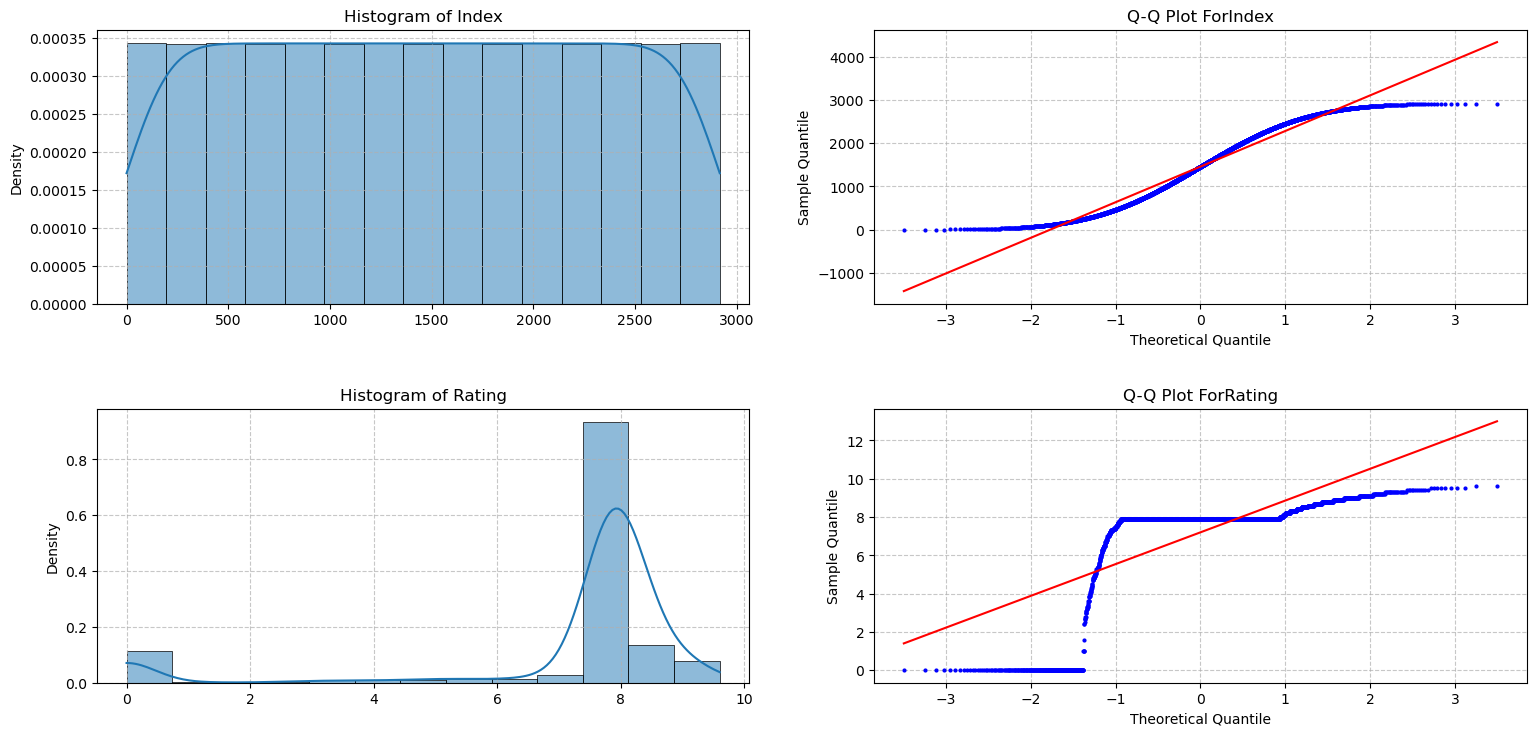

In [519]:
# create a figure and axes for subplots
num_cols=len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols*4))

# plotting histogram and Q-Q plots for each numerical columns
for i, col in enumerate(numerical_columns):
    
#Histogram on the left sublot
    sns.histplot(df[col],kde=True, ax=axes[i,0],stat='density',linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('Density')
    axes[i,0].grid(True,linestyle='--',alpha=0.7)

#Q-Q plot onthe right subplot
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit =True)
    axes[i,1].get_lines()[0].set_markersize(2.0) # adjust marker size for
    axes[i,1].grid(True,linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot For{col}')
    axes[i,1].set_xlabel('Theoretical Quantile')
    axes[i,1].set_ylabel('Sample Quantile')

#Adjust layout and display
plt.tight_layout(pad=3.0)
plt.show()

In [520]:
def find_outliers_iqr(data):
    outliers_mask= pd.Series(index=data.columns, dtype=bool)
    for col in data.columns:
        if col in numerical_columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col]<lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any() #True if
    return outliers_mask
            
outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detectd using IQR methos:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")

Outliers detectd using IQR methos:
Index: False
Title: True
Desc: True
Type: True
BodyPart: True
Equipment: True
Level: True
Rating: True
RatingDesc: True


# Data Visualization and Analysis

##  determining the muscle group that has the most amount of exercises available.

In [523]:
count_exercises = df.groupby(['BodyPart']).count()
count_exercises


,Index,Title,Desc,Type,Equipment,Level,Rating,RatingDesc
BodyPart,,,,,,,,
Abdominals,662,662,662,662,662,662,662,662
Abductors,21,21,21,21,21,21,21,21
Adductors,17,17,17,17,17,17,17,17
Biceps,168,168,168,168,168,168,168,168
Calves,47,47,47,47,47,47,47,47
Chest,262,262,262,262,262,262,262,262
Forearms,31,31,31,31,31,31,31,31
Glutes,81,81,81,81,81,81,81,81
Hamstrings,121,121,121,121,121,121,121,121


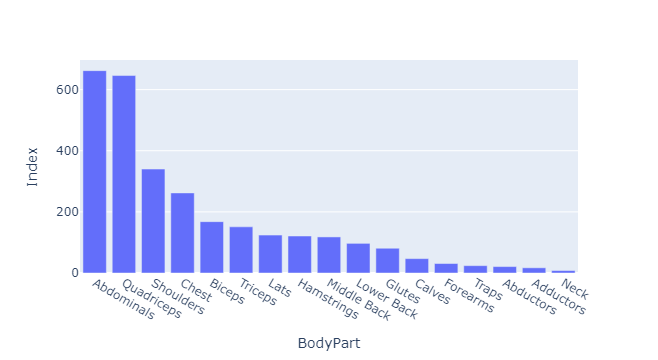

In [524]:
count_exercises= count_exercises.sort_values(by='Index', ascending= False)
fig = px.bar(count_exercises, x=count_exercises.index, y='Index')
fig.show()

## Let's dive a bit further into it and analyse the dataset in the perspective of beginners.

In [526]:
beginner = df[df.Level == 'Beginner']
beginner

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
11,11,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Above Average
12,12,Barbell Side Bend,The barbell back squat is a popular compound m...,Strength,Abdominals,Barbell,Beginner,7.0,Average
20,20,Advanced Kettlebell Windmill,The barbell back squat is a popular compound m...,Strength,Abdominals,Kettlebells,Beginner,8.3,Above Average
22,22,Kettlebell Pass Between The Legs,The barbell back squat is a popular compound m...,Strength,Abdominals,Kettlebells,Beginner,7.3,Above Average
40,40,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3,Above Average
...,...,...,...,...,...,...,...,...,...
2841,2841,Low Cable Triceps Extension,The barbell back squat is a popular compound m...,Strength,Triceps,Cable,Beginner,8.2,Above Average
2889,2889,Standing Towel Triceps Extension,The barbell back squat is a popular compound m...,Strength,Triceps,Body Only,Beginner,6.5,Average
2892,2892,Overhead Triceps,The barbell back squat is a popular compound m...,Stretching,Triceps,Body Only,Beginner,3.3,Below Average
2910,2910,Supine Chest Throw,The barbell back squat is a popular compound m...,Plyometrics,Triceps,Medicine Ball,Beginner,8.2,Above Average


In [527]:
body_only =beginner[beginner.Equipment == 'Body Only']
body_only

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
194,194,Gorilla Chin/Crunch,The barbell back squat is a popular compound m...,Strength,Abdominals,Body Only,Beginner,9.0,Above Average
202,202,Crunch - Hands Overhead,The barbell back squat is a popular compound m...,Strength,Abdominals,Body Only,Beginner,8.6,Above Average
204,204,Stomach Vacuum,The barbell back squat is a popular compound m...,Stretching,Abdominals,Body Only,Beginner,8.5,Above Average
208,208,Butt-Ups,The barbell back squat is a popular compound m...,Strength,Abdominals,Body Only,Beginner,8.3,Above Average
217,217,Janda Sit-Up,The barbell back squat is a popular compound m...,Strength,Abdominals,Body Only,Beginner,7.4,Above Average
...,...,...,...,...,...,...,...,...,...
2763,2763,Side Wrist Pull,The barbell back squat is a popular compound m...,Stretching,Shoulders,Body Only,Beginner,8.4,Above Average
2764,2764,Elbow Circles,The barbell back squat is a popular compound m...,Stretching,Shoulders,Body Only,Beginner,5.3,Average
2765,2765,Kneeling Arm Drill,The barbell back squat is a popular compound m...,Plyometrics,Shoulders,Body Only,Beginner,4.0,Below Average
2889,2889,Standing Towel Triceps Extension,The barbell back squat is a popular compound m...,Strength,Triceps,Body Only,Beginner,6.5,Average


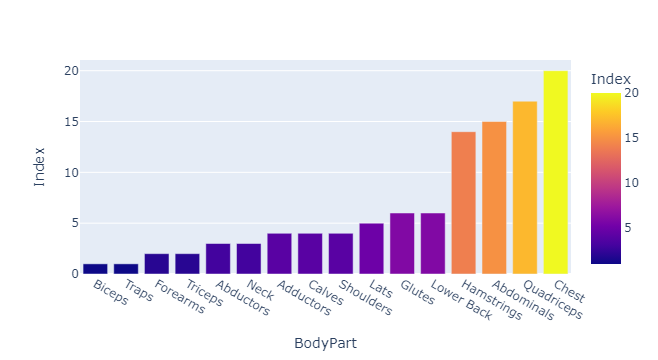

In [528]:
beginner_bodyOnly = body_only.groupby(['BodyPart']).count()
beginner_bodyOnly= beginner_bodyOnly.sort_values(by='Index')
fig = px.bar(beginner_bodyOnly, x=beginner_bodyOnly.index, y='Index', color ='Index')
fig.show()

In [529]:
print("Row count:\t" + str(df.shape[0]))
print("Col count:\t" + str(df.shape[1]))

Row count:	2918
Col count:	9


In [530]:
bodyPart_dist=df.groupby(['Type','BodyPart']).count()
bodyPart_dist

Index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     2          2      2       2   
          Calves           1      1     1          1      1       1   
          Chest            1      1     1          1      1       1   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     2          2      2       2   
          Hamstrings       1      1     1          1      1       1   
          Lower Back       4      4     4          4      4       4   
          Quadriceps      10     10    10         10     10      10   
          Shoulders        4      4     4          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            2  
          Calves                1  
          Chest                 1  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps           10  
          Shoulders             4  

[65 rows x 7 columns]

In [531]:
bodyPart_dist=bodyPart_dist.groupby(level=[0,1]).sum()
bodyPart_dist

Index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     2          2      2       2   
          Calves           1      1     1          1      1       1   
          Chest            1      1     1          1      1       1   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     2          2      2       2   
          Hamstrings       1      1     1          1      1       1   
          Lower Back       4      4     4          4      4       4   
          Quadriceps      10     10    10         10     10      10   
          Shoulders        4      4     4          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            2  
          Calves                1  
          Chest                 1  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps           10  
          Shoulders             4  

[65 rows x 7 columns]

In [532]:
allTypes =(df["Type"].unique())
len(allTypes)

7

In [533]:
typeDfs = []
for i in range(7):
    typeDfs.append(bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == allTypes[i]])

In [534]:
cardio =bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == 'Cardio']

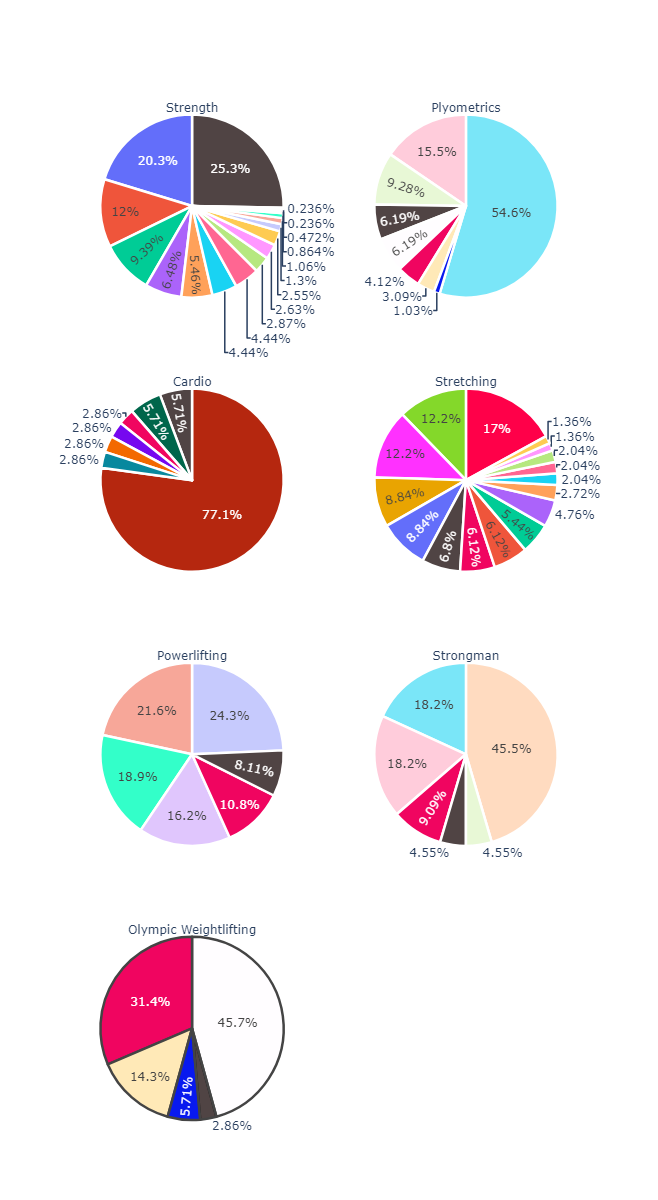

In [535]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
          ])

fig.add_trace(go.Pie(values=typeDfs[0]['Index'].values, title=allTypes[0], labels=typeDfs[0].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)
    
fig.add_trace(go.Pie(values=typeDfs[1]['Index'].values, title=allTypes[1], labels=typeDfs[1].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)
fig.add_trace(go.Pie(values=typeDfs[2]['Index'].values, title=allTypes[2], labels=typeDfs[2].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)
fig.add_trace(go.Pie(values=typeDfs[3]['Index'].values, title=allTypes[3],labels=typeDfs[3].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)
fig.add_trace(go.Pie(values=typeDfs[4]['Index'].values, title=allTypes[4], labels=typeDfs[4].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=1)
fig.add_trace(go.Pie(values=typeDfs[5]['Index'].values, title=allTypes[5], labels=typeDfs[5].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=2)
fig.add_trace(go.Pie(values=typeDfs[6]['Index'].values, title=allTypes[6], labels=typeDfs[6].index,marker=dict(colors=['#100b','#f00560'], line=dict( width=2.5))),
              row=4, col=1)
fig.update_layout(height=900, showlegend=False)
fig.update_layout(height=1200, showlegend=False)

## Percentage of exercise by levels

In [537]:
level_counts=df.groupby(['Level']).count()
level_counts

,Index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,459,459,459,459,459,459,459,459
Expert,13,13,13,13,13,13,13,13
Intermediate,2446,2446,2446,2446,2446,2446,2446,2446


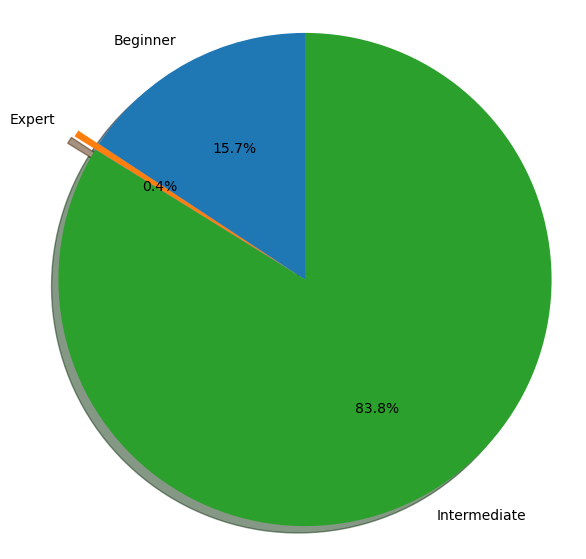

<Figure size 100x100 with 0 Axes>

In [538]:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(level_counts.Title, explode=explode, labels=level_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(1,1))

plt.show()

## Analyse wrt Equipment

In [540]:
equip_data=df.groupby(['Equipment']).count()
equip_data

,Index,Title,Desc,Type,BodyPart,Level,Rating,RatingDesc
Equipment,,,,,,,,
Bands,100,100,100,100,100,100,100,100
Barbell,282,282,282,282,282,282,282,282
Body Only,1110,1110,1110,1110,1110,1110,1110,1110
Cable,226,226,226,226,226,226,226,226
Dumbbell,516,516,516,516,516,516,516,516
E-Z Curl Bar,22,22,22,22,22,22,22,22
Exercise Ball,35,35,35,35,35,35,35,35
Foam Roll,11,11,11,11,11,11,11,11
Kettlebells,149,149,149,149,149,149,149,149


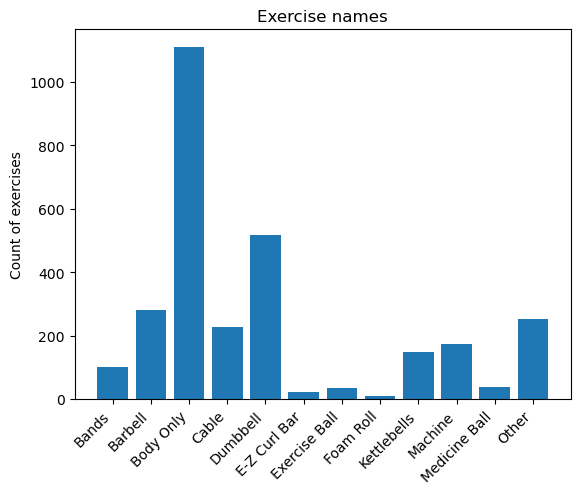

In [541]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(equip_data.index, equip_data.Title)

ax.set_ylabel('Count of exercises')
ax.set_title('Exercise names')
plt.xticks(rotation=45, ha='right')

plt.show()

# Best exercises to target Legs

## analyse quads and glutes.

In [544]:
leg_exer= df[df['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=False)
leg_exer_best =leg_exer[leg_exer['Type']=='Strength'].head(5)
leg_exer_best

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2065,2065,Single-Leg Press,The single-leg leg press is an exercise target...,Strength,Quadriceps,Machine,Intermediate,9.6,Above Average
1799,1799,Barbell Full Squat,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Intermediate,9.4,Above Average
1804,1804,Barbell walking lunge,The barbell walking lunge tests your ability t...,Strength,Quadriceps,Barbell,Intermediate,9.2,Above Average
1872,1872,Front Squats With Two Kettlebells,The barbell back squat is a popular compound m...,Strength,Quadriceps,Kettlebells,Beginner,9.2,Above Average
1873,1873,Kettlebell Pistol Squat,The barbell back squat is a popular compound m...,Strength,Quadriceps,Kettlebells,Beginner,9.1,Above Average


In [545]:
leg_exer_worst= df[df['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=True)
leg_exer_worst =leg_exer_worst[leg_exer_worst['Type']=='Strength'].head(5)
leg_exer_worst

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
1844,1844,Barbell step-down reverse lunge,The barbell step-down reverse lunge is an exer...,Strength,Quadriceps,Barbell,Intermediate,0.0,No Rating
1843,1843,Front Squat (Bodybuilder),The barbell front squat is a compound movement...,Strength,Quadriceps,Barbell,Intermediate,0.0,No Rating
1840,1840,Box Squat with Chains,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Beginner,0.0,No Rating
1839,1839,Barbell Front-To-Back Squat,The barbell front squat to back squat is a com...,Strength,Quadriceps,Barbell,Intermediate,0.0,No Rating
1838,1838,Squat Jerk,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Beginner,0.0,No Rating


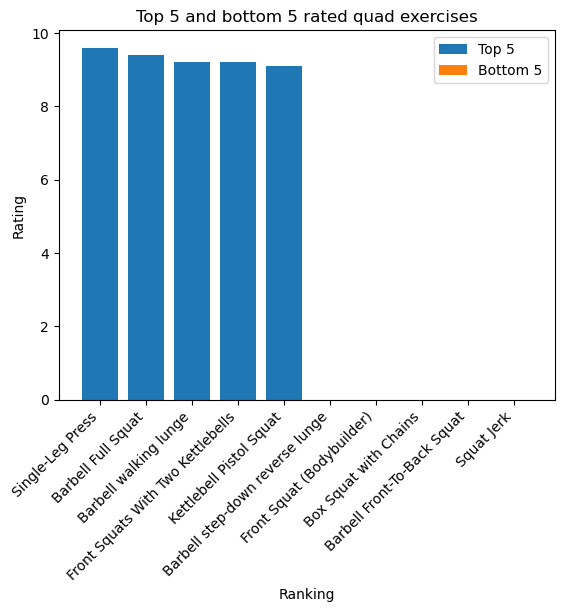

In [546]:
import numpy as np 
import matplotlib.pyplot as plt 
     
plt.bar(leg_exer_best.Title,leg_exer_best.Rating, label = 'Top 5')
plt.bar(leg_exer_worst.Title,leg_exer_worst.Rating, label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated quad exercises")
plt.legend()
plt.show()

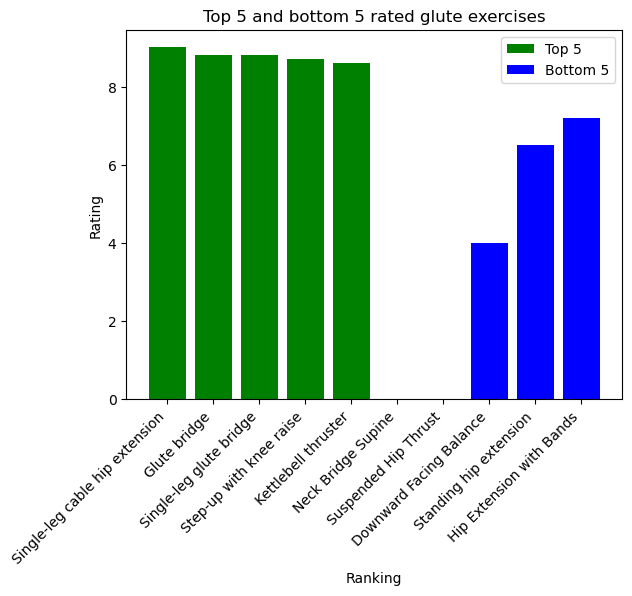

In [547]:
glute_exer= df[df['BodyPart']=='Glutes'].sort_values(by='Rating',ascending=False)
glute_exer_best =glute_exer[glute_exer['Type']=='Strength'].head(5)

glute_exer_worst= df[df['BodyPart']=='Glutes'].sort_values(by='Rating',ascending=True)
glute_exer_worst =glute_exer_worst[glute_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(glute_exer_best.Title,glute_exer_best.Rating,color='g', label = 'Top 5')
plt.bar(glute_exer_worst.Title,glute_exer_worst.Rating,color='b', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated glute exercises")
plt.legend()
plt.show()

# Best Upper body exercises

## Since back and chest are the largest muscle groups in the upper body, lets analyse the two

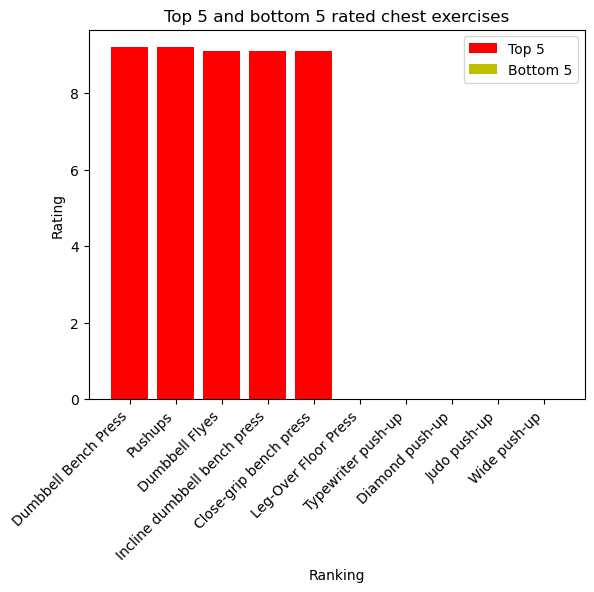

In [550]:
chest_exer= df[df['BodyPart']=='Chest'].sort_values(by='Rating',ascending=False)
chest_exer_best =chest_exer[chest_exer['Type']=='Strength'].head(5)

chest_exer_worst= df[df['BodyPart']=='Chest'].sort_values(by='Rating',ascending=True)
chest_exer_worst =chest_exer_worst[chest_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(chest_exer_best.Title,chest_exer_best.Rating,color='r', label = 'Top 5')
plt.bar(chest_exer_worst.Title,chest_exer_worst.Rating,color='y', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated chest exercises")
plt.legend()
plt.show()

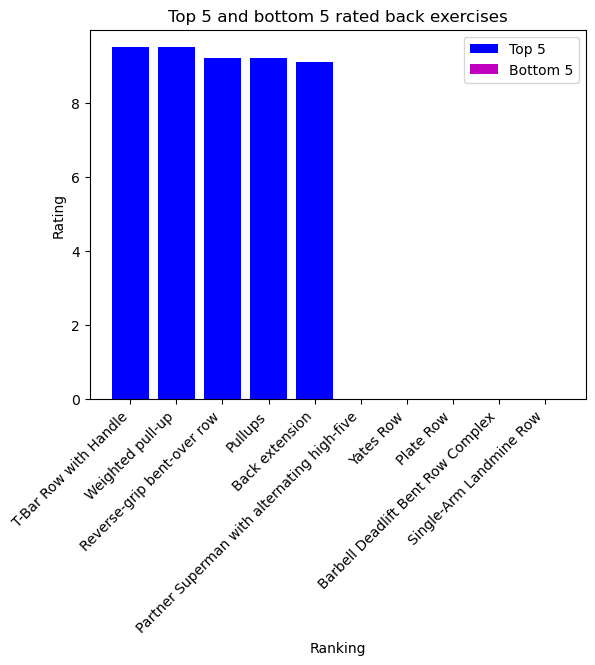

In [551]:
options = ['Lats','Lower Back','Middle Back']
back_exer= df[df['BodyPart'].isin(options)].sort_values(by='Rating',ascending=False)
back_exer_best =back_exer[back_exer['Type']=='Strength'].head(5)

back_exer_worst= df[df['BodyPart'].isin(options)].sort_values(by='Rating',ascending=True)
back_exer_worst =back_exer_worst[back_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(back_exer_best.Title,back_exer_best.Rating,color='b', label = 'Top 5')
plt.bar(back_exer_worst.Title,back_exer_worst.Rating,color='m', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated back exercises")
plt.legend()
plt.show()

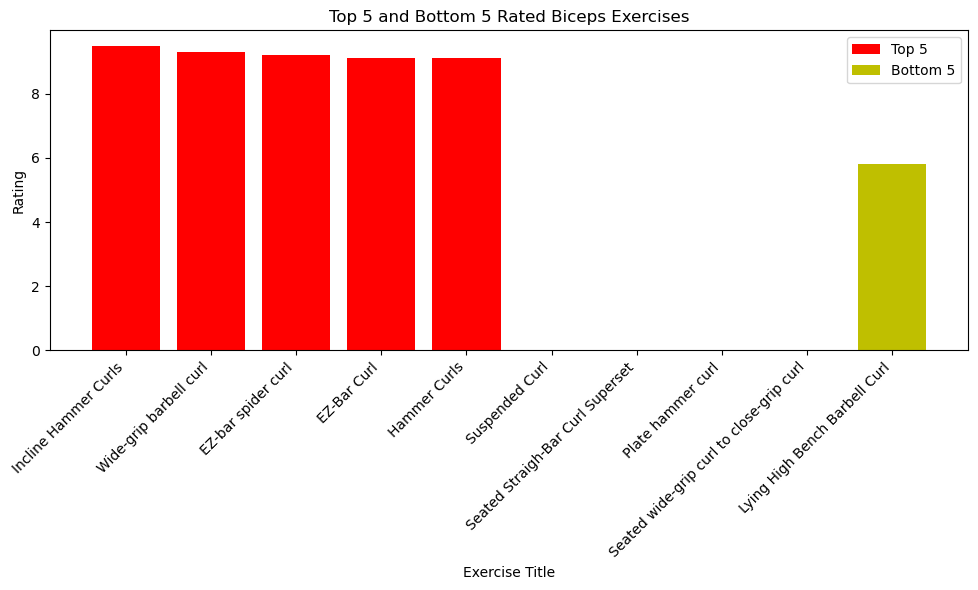

In [552]:


# Filter for biceps exercises
biceps_exer = df[df['BodyPart'] == 'Biceps'].sort_values(by='Rating', ascending=False)

# Select top 5 and bottom 5 strength exercises for biceps
biceps_exer_best = biceps_exer[biceps_exer['Type'] == 'Strength'].head(5)
biceps_exer_worst = biceps_exer[biceps_exer['Type'] == 'Strength'].sort_values(by='Rating', ascending=True).head(5)

# Plot
plt.figure(figsize=(10, 6))

# Plot top 5
plt.bar(biceps_exer_best['Title'], biceps_exer_best['Rating'], color='r', label='Top 5')

# Plot bottom 5
plt.bar(biceps_exer_worst['Title'], biceps_exer_worst['Rating'], color='y', label='Bottom 5')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Exercise Title")
plt.ylabel("Rating")
plt.title("Top 5 and Bottom 5 Rated Biceps Exercises")
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


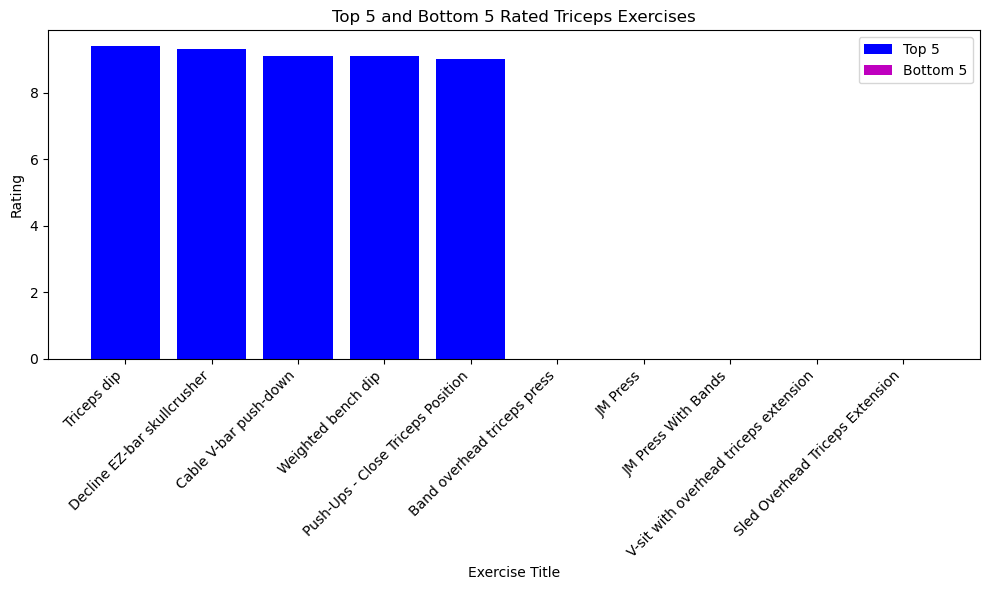

In [553]:
triceps_exer = df[df['BodyPart'] == 'Triceps'].sort_values(by='Rating', ascending=False)

# Select top 5 and bottom 5 strength exercises for triceps
triceps_exer_best = triceps_exer[triceps_exer['Type'] == 'Strength'].head(5)
triceps_exer_worst = triceps_exer[triceps_exer['Type'] == 'Strength'].sort_values(by='Rating', ascending=True).head(5)

# Plot
plt.figure(figsize=(10, 6))

# Plot top 5
plt.bar(triceps_exer_best['Title'], triceps_exer_best['Rating'], color='b', label='Top 5')

# Plot bottom 5
plt.bar(triceps_exer_worst['Title'], triceps_exer_worst['Rating'], color='m', label='Bottom 5')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Exercise Title")
plt.ylabel("Rating")
plt.title("Top 5 and Bottom 5 Rated Triceps Exercises")
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

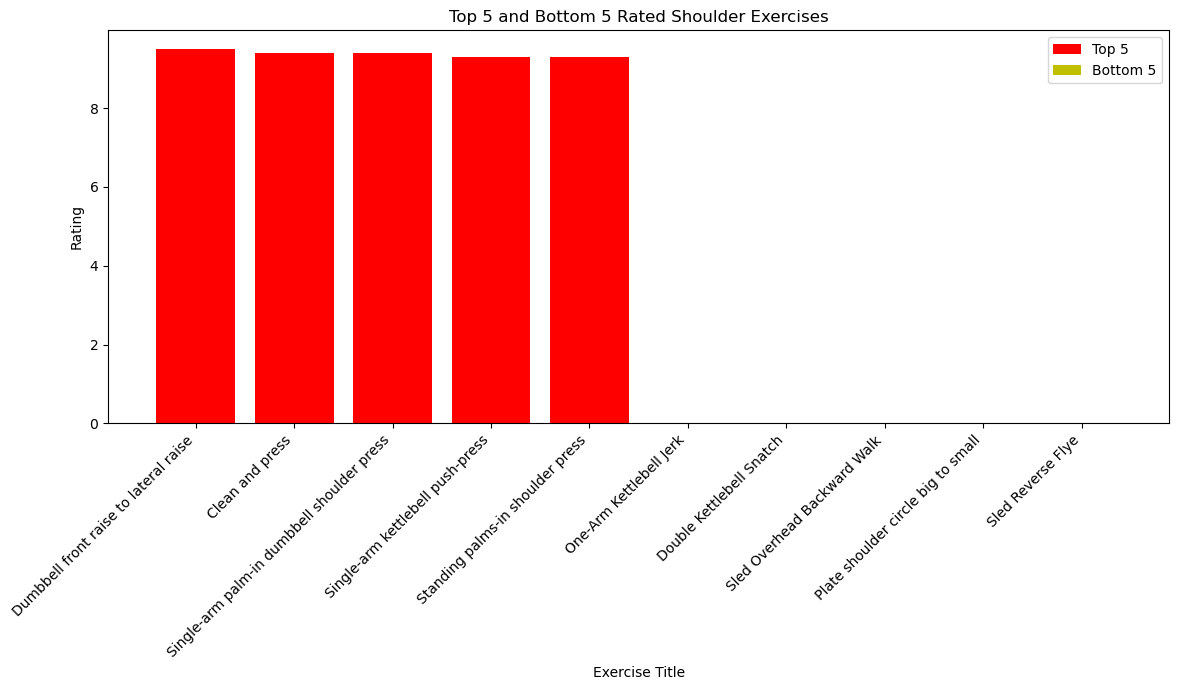

In [554]:
import matplotlib.pyplot as plt

# Filter for shoulder exercises
shoulder_exer = df[df['BodyPart'] == 'Shoulders'].sort_values(by='Rating', ascending=False)

# Select top 5 and bottom 5 strength exercises for shoulders
shoulder_exer_best = shoulder_exer[shoulder_exer['Type'] == 'Strength'].head(5)
shoulder_exer_worst = shoulder_exer[shoulder_exer['Type'] == 'Strength'].sort_values(by='Rating', ascending=True).head(5)

# Plot
plt.figure(figsize=(12, 7))

# Plot top 5
plt.bar(shoulder_exer_best['Title'], shoulder_exer_best['Rating'], color='r', label='Top 5')

# Plot bottom 5
plt.bar(shoulder_exer_worst['Title'], shoulder_exer_worst['Rating'], color='y', label='Bottom 5')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Exercise Title")
plt.ylabel("Rating")
plt.title("Top 5 and Bottom 5 Rated Shoulder Exercises")
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


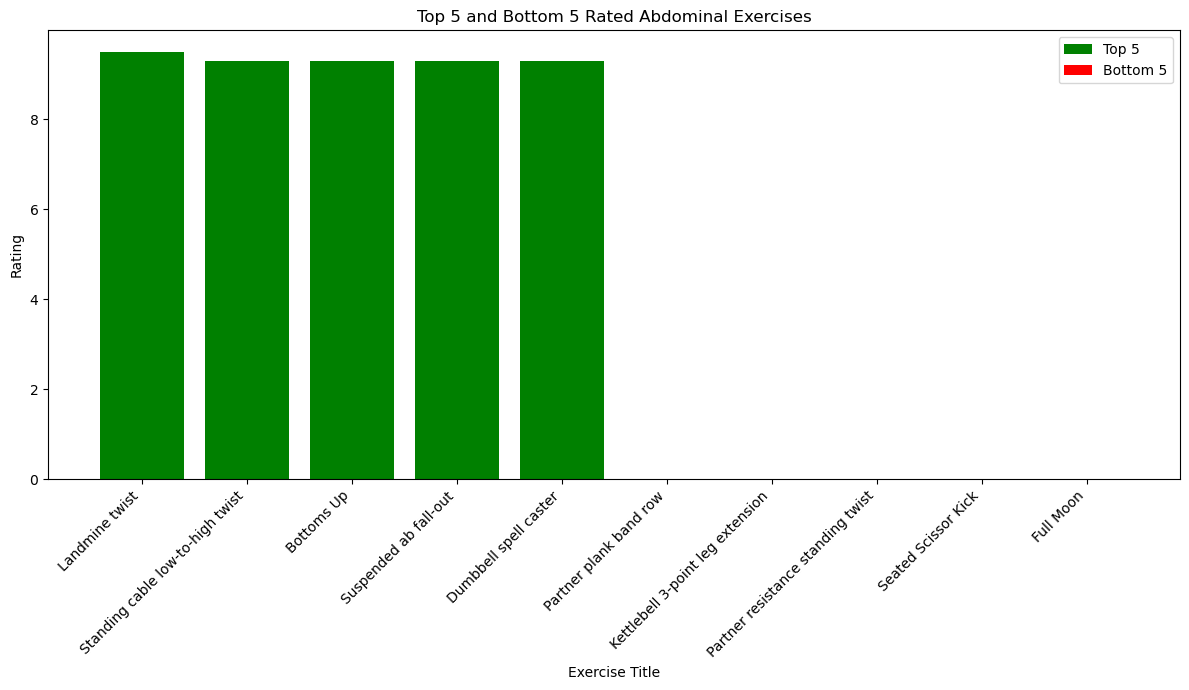

In [555]:
import matplotlib.pyplot as plt

# Filter for abdominal exercises
abdominal_exer = df[df['BodyPart'] == 'Abdominals'].sort_values(by='Rating', ascending=False)

# Select top 5 and bottom 5 strength exercises for abdominals
abdominal_exer_best = abdominal_exer[abdominal_exer['Type'] == 'Strength'].head(5)
abdominal_exer_worst = abdominal_exer[abdominal_exer['Type'] == 'Strength'].sort_values(by='Rating', ascending=True).head(5)

# Plot
plt.figure(figsize=(12, 7))

# Plot top 5
plt.bar(abdominal_exer_best['Title'], abdominal_exer_best['Rating'], color='g', label='Top 5')

# Plot bottom 5
plt.bar(abdominal_exer_worst['Title'], abdominal_exer_worst['Rating'], color='r', label='Bottom 5')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Exercise Title")
plt.ylabel("Rating")
plt.title("Top 5 and Bottom 5 Rated Abdominal Exercises")
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


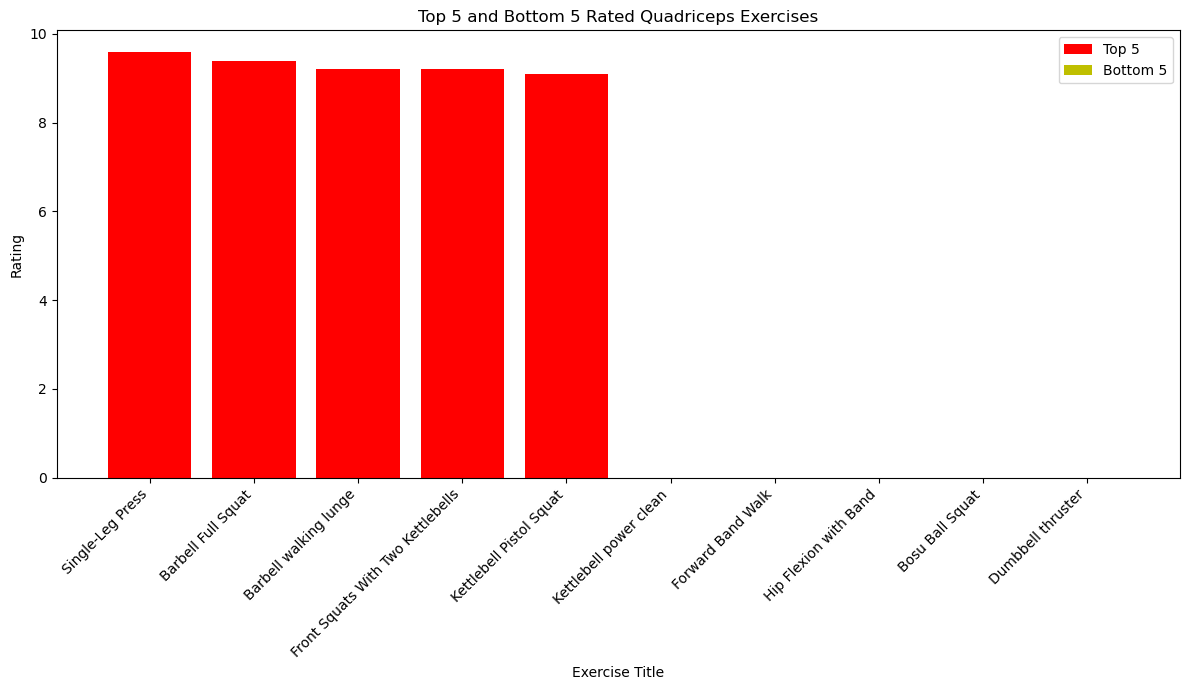

In [556]:
import matplotlib.pyplot as plt

# Filter for quadriceps exercises
quadriceps_exer = df[df['BodyPart'] == 'Quadriceps'].sort_values(by='Rating', ascending=False)

# Select top 5 and bottom 5 strength exercises for quadriceps
quadriceps_exer_best = quadriceps_exer[quadriceps_exer['Type'] == 'Strength'].head(5)
quadriceps_exer_worst = quadriceps_exer[quadriceps_exer['Type'] == 'Strength'].sort_values(by='Rating', ascending=True).head(5)

# Plot
plt.figure(figsize=(12, 7))

# Plot top 5
plt.bar(quadriceps_exer_best['Title'], quadriceps_exer_best['Rating'], color='r', label='Top 5')

# Plot bottom 5
plt.bar(quadriceps_exer_worst['Title'], quadriceps_exer_worst['Rating'], color='y', label='Bottom 5')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Exercise Title")
plt.ylabel("Rating")
plt.title("Top 5 and Bottom 5 Rated Quadriceps Exercises")
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
